# M5 Master Dataset – Concise EDA

This notebook performs basic EDA on the M5-style master dataset.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Load data
df = pd.read_csv("./outputs/master_dataset.csv", parse_dates=["date"])


C:\Users\EduardCP\AppData\Local\Temp\ipykernel_21784\1920499353.py:2: DtypeWarning: Columns (16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/outputs/master_dataset.csv", parse_dates=["date"])


In [4]:
## 1. Basic Checks
print("Shape:", df.shape)
print("\nMissing values (top 10):")
print(df.isna().sum().sort_values(ascending=False).head(10))

print("\nDate range:", df["date"].min(), "to", df["date"].max())
print("Stores:", df["store_id"].nunique())
print("Items:", df["item_id"].nunique())


Shape: (1620487, 23)

Missing values (top 10):
event_type_2    1616372
event_name_2    1616372
event_name_1    1487161
event_type_1    1487161
sell_price       327782
revenue          327782
id                    0
split                 0
store_id              0
state_id              0
dtype: int64

Date range: 2011-01-29 00:00:00 to 2016-06-19 00:00:00
Stores: 1
Items: 823


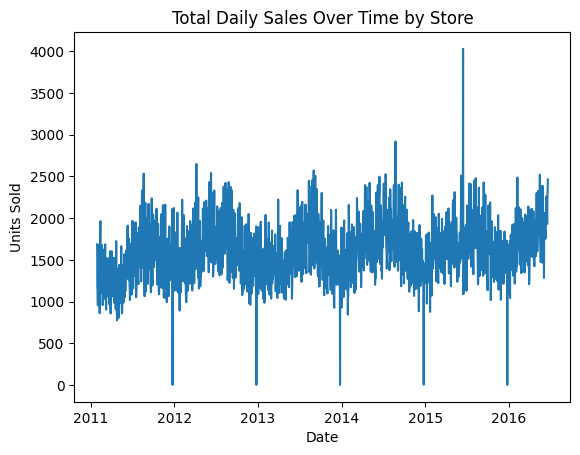

In [5]:
## 2. Overall Sales Over Time (by Store)
sales_store_time = (
    df.groupby(["date", "store_id"], as_index=False)["sales"]
    .sum()
)

plt.figure()
for store, g in sales_store_time.groupby("store_id"):
    plt.plot(g["date"], g["sales"])
plt.title("Total Daily Sales Over Time by Store")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()


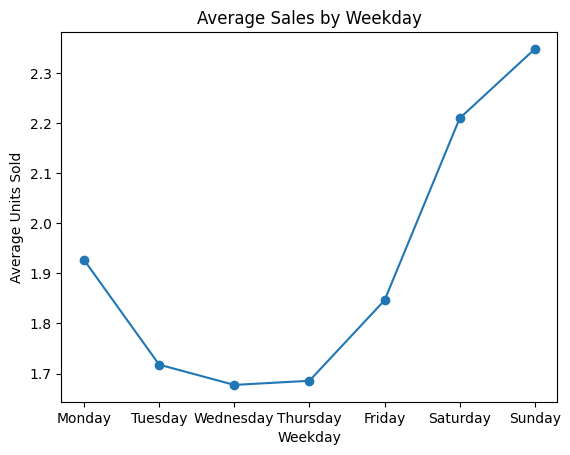

In [6]:
## 3. Weekly Seasonality
df["weekday"] = df["date"].dt.day_name()

weekday_avg = (
    df.groupby("weekday", as_index=False)["sales"]
    .mean()
)

order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekday_avg["weekday"] = pd.Categorical(weekday_avg["weekday"], categories=order, ordered=True)
weekday_avg = weekday_avg.sort_values("weekday")

plt.figure()
plt.plot(weekday_avg["weekday"], weekday_avg["sales"], marker="o")
plt.title("Average Sales by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Units Sold")
plt.show()


In [7]:
## 4. Event and SNAP Impact
event_cols = [c for c in df.columns if c.startswith("event_name")]
snap_cols = [c for c in df.columns if c.startswith("snap_")]

df["is_event"] = df[event_cols].notna().any(axis=1)
df["is_snap"] = df[snap_cols].eq(1).any(axis=1)

impact = (
    df.groupby(["is_event", "is_snap"], as_index=False)["sales"]
    .mean()
)

impact


,is_event,is_snap,sales
0,False,False,1.839558
1,False,True,2.076766
2,True,False,1.801713
3,True,True,2.086440


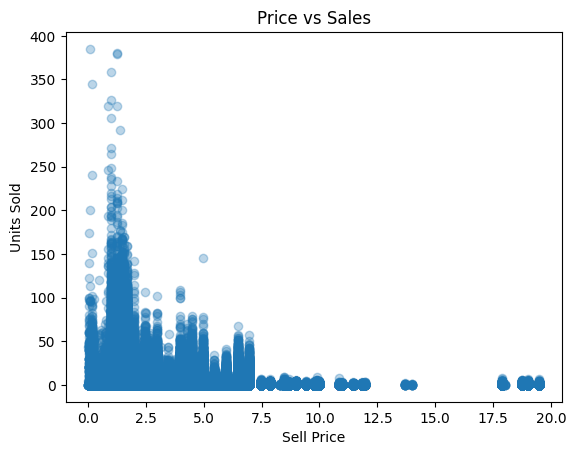

In [8]:
## 5. Price vs Sales
price_sales = df.dropna(subset=["sell_price"])

plt.figure()
plt.scatter(price_sales["sell_price"], price_sales["sales"], alpha=0.3)
plt.title("Price vs Sales")
plt.xlabel("Sell Price")
plt.ylabel("Units Sold")
plt.show()


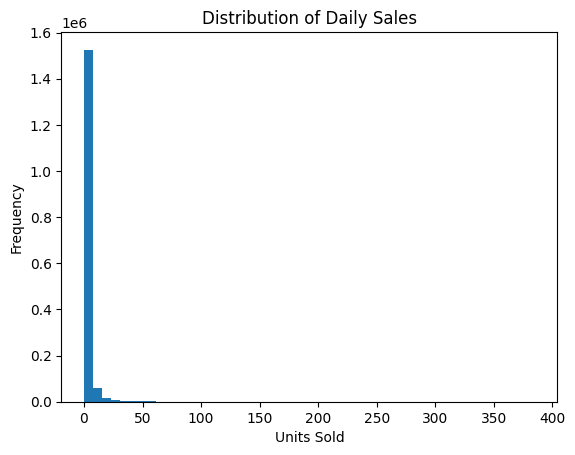

Zero-sales proportion: 61.76%


In [9]:
## Sales distribution and zero-inflation

# Distribution of daily sales
plt.figure()
plt.hist(df["sales"], bins=50)
plt.title("Distribution of Daily Sales")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.show()

# Percentage of zero-sales days
zero_rate = (df["sales"] == 0).mean()
print(f"Zero-sales proportion: {zero_rate:.2%}")


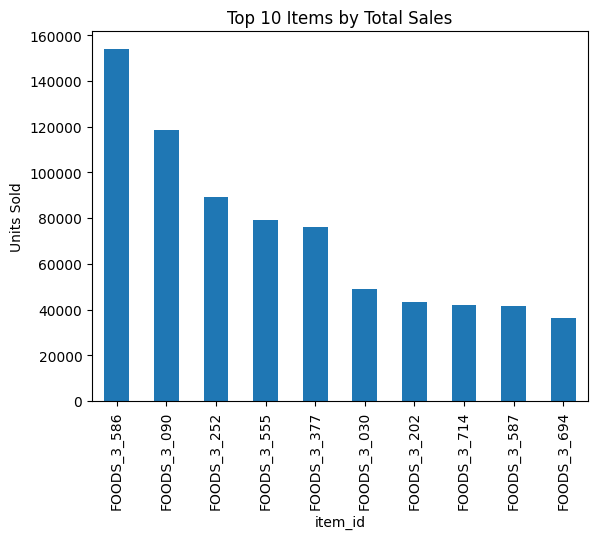

In [10]:
# Top 10 items by total sales
top_items = (
    df.groupby("item_id")["sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_items.plot(kind="bar")
plt.title("Top 10 Items by Total Sales")
plt.ylabel("Units Sold")
plt.show()

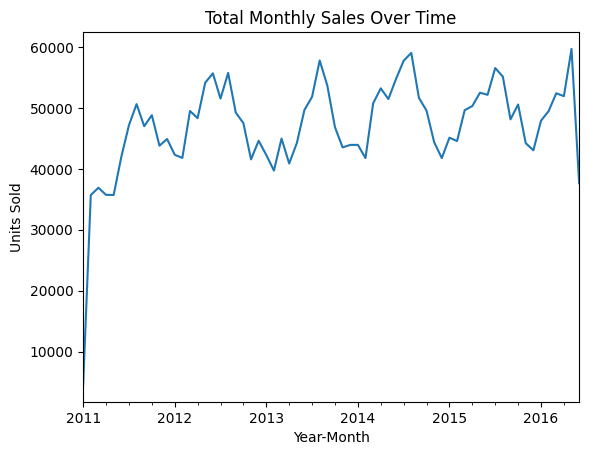

In [12]:
## monthly and yeaerly seasonality 

df["year_month"] = df["date"].dt.to_period("M")

monthly_sales = (
    df.groupby("year_month")["sales"]
    .sum()
)

monthly_sales.plot()
plt.title("Total Monthly Sales Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Units Sold")
plt.show()